The description of the kernel density estimation implementation can be found in `KernelDensity`<br>
The type of kernel is specified in the kernel parameter, and it is possible to use 'gaussian' (default choice), 'tophat', 'epanechnikov', 'exponential',
'linear' or 'cosine' as values. Once the kernel type has been chosen, all the kernels (or “windows”) used present the same value for the unique “window” width parameter called bandwidth here.<br>
It is then possible to use a spatial index (here of the KD
tree or Ball tree type, algorithm ['kd_tree'|'ball_tree'|'auto'] to avoid
calculating the kernel between data that are too far apart.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# generate the sample from two normal distributions
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
# prepare the points where the density is calculated
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
# preparing the display of the true density, which is that from
# from which the data was generated (see above)
# the weighting of the distributions in the sum is the weighting of the
#distributions in generated sample (see above)
true_density=(0.3*norm(0,1).pdf(X_plot[:,0])+0.7*norm(5,1).pdf(X_plot[:,0]))

In [4]:
# density estimation by Gaussian kernels
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)

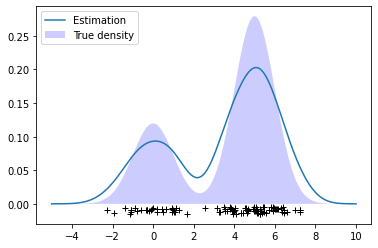

In [5]:
# density calculation for X_plot data
density = np.exp(kde.score_samples(X_plot))

# display: true density and estimate
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label= 'True density')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.show()

### Question 1: Vary the sample size and examine the results?

In [20]:
# define a function to generate different sample size
def generate_sample_withDifferentSize(sample_size):
  N = sample_size
  X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
  X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
  true_density=(0.3*norm(0,1).pdf(X_plot[:,0])+0.7*norm(5,1).pdf(X_plot[:,0]))
  # density estimation by Gaussian kernels
  kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
  density = np.exp(kde.score_samples(X_plot))
  # display: true density and estimate
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label= 'True density')
  ax.plot(X_plot[:,0], density, '-', label="Estimation")
  ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
  plt.title("Sample size : " + str(sample_size))
  ax.legend(loc='upper left')
  plt.show()

In [ ]:
l=[i for i in range(10,511,50)] 
for size in l :
  generate_sample_withDifferentSize(size)

### Question 2: Vary the number of normal distributions when generating the sample and examine the results.

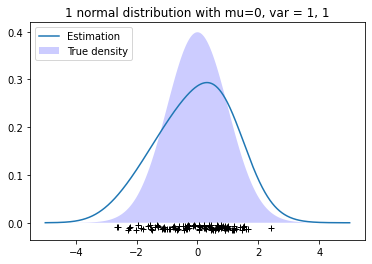

In [84]:
# 1 normal distribution 
# generate the sample from two normal distributions
N = 100
X = np.random.normal(0, 1, int(1 * N))[:, np.newaxis]
# prepare the points where the density is calculated
X_plot = np.linspace(-5, 5, 1000)[:, np.newaxis]
true_density=(1*norm(0,1).pdf(X_plot[:,0]))

# density estimation by Gaussian kernels
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)

# density calculation for X_plot data
density = np.exp(kde.score_samples(X_plot))

# display: true density and estimate
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label= 'True density')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.title(f'1 normal distribution with mu=0, var = 1, 1')
plt.show()

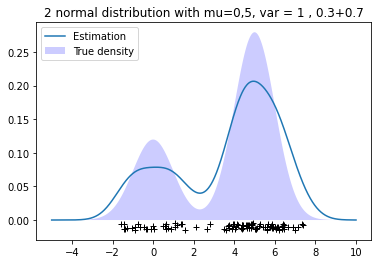

In [52]:
# 2 normal distribution 
# generate the sample from two normal distributions
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
# prepare the points where the density is calculated
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
true_density=(0.3*norm(0,1).pdf(X_plot[:,0])+0.7*norm(5,1).pdf(X_plot[:,0]))

# density estimation by Gaussian kernels
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)

# density calculation for X_plot data
density = np.exp(kde.score_samples(X_plot))

# display: true density and estimate
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label= 'True density')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.title(f'2 normal distribution with mu=0,5, var = 1 , 0.3+0.7')
plt.show()

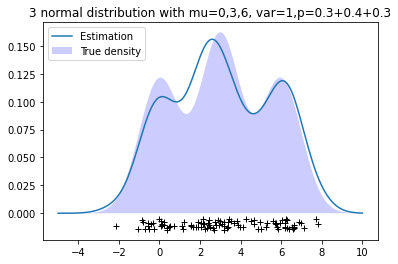

In [90]:
# 3 normal distribution 
# generate the sample from two normal distributions
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), np.random.normal(3, 1, int(0.4 * N)), np.random.normal(6,1,int(0.3*N))))[:, np.newaxis]
# prepare the points where the density is calculated
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
true_density=(0.3*norm(0,1).pdf(X_plot[:,0])+0.4*norm(3,1).pdf(X_plot[:,0])+0.3*norm(6,1).pdf(X_plot[:,0]))

# density estimation by Gaussian kernels
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)

# density calculation for X_plot data
density = np.exp(kde.score_samples(X_plot))

# display: true density and estimate
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label= 'True density')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.title(f'3 normal distribution with mu=0,3,6, var=1,p=0.3+0.4+0.3')
plt.show()

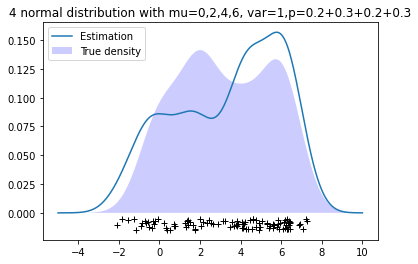

In [86]:
# generate the sample from two normal distributions
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.2 * N)),np.random.normal(2, 1, int(0.2 * N)),np.random.normal(4, 1, int(0.3 * N)), np.random.normal(6, 1, int(0.3 * N))))[:, np.newaxis]
# prepare the points where the density is calculated
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
# preparing the display of the true density, which is that from
# from which the data was generated (see above)
# the weighting of the distributions in the sum is the weighting of the
#distributions in generated sample (see above)
true_density=(0.2*norm(0,1).pdf(X_plot[:,0])+0.3*norm(2,1).pdf(X_plot[:,0])+0.2*norm(4,1).pdf(X_plot[:,0])+0.3*norm(6,1).pdf(X_plot[:,0]))

# density estimation by Gaussian kernels
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)

# density calculation for X_plot data
density = np.exp(kde.score_samples(X_plot))

# display: true density and estimate
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label= 'True density')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.title(f'4 normal distribution with mu=0,2,4,6, var=1,p=0.2+0.3+0.2+0.3')
plt.show()

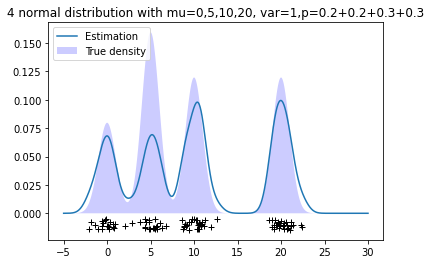

In [87]:
# generate the sample from two normal distributions
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.2 * N)),np.random.normal(5, 1, int(0.2 * N)),np.random.normal(10, 1, int(0.3 * N)), np.random.normal(20, 1, int(0.3 * N))))[:, np.newaxis]
# prepare the points where the density is calculated
X_plot = np.linspace(-5, 30, 1000)[:, np.newaxis]
# preparing the display of the true density, which is that from
# from which the data was generated (see above)
# the weighting of the distributions in the sum is the weighting of the
#distributions in generated sample (see above)
true_density=(0.2*norm(0,1).pdf(X_plot[:,0])+0.2*norm(5,1).pdf(X_plot[:,0])+0.2*norm(5,1).pdf(X_plot[:,0])+0.3*norm(10,1).pdf(X_plot[:,0])+0.3*norm(20,1).pdf(X_plot[:,0]))

# density estimation by Gaussian kernels
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)

# density calculation for X_plot data
density = np.exp(kde.score_samples(X_plot))

# display: true density and estimate
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label= 'True density')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.title(f'4 normal distribution with mu=0,5,10,20, var=1,p=0.2+0.2+0.3+0.3')
plt.show()

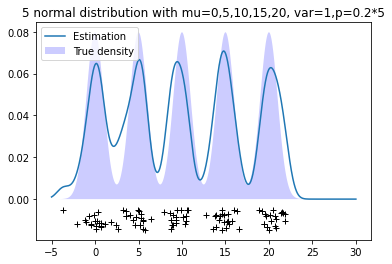

In [89]:
# generate the sample from two normal distributions
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.2 * N)),np.random.normal(5, 1, int(0.2 * N)),np.random.normal(10, 1, int(0.2 * N)), np.random.normal(15, 1, int(0.2 * N)), np.random.normal(20, 1, int(0.2 * N))))[:, np.newaxis]
# prepare the points where the density is calculated
X_plot = np.linspace(-5, 30, 1000)[:, np.newaxis]
# preparing the display of the true density, which is that from
# from which the data was generated (see above)
# the weighting of the distributions in the sum is the weighting of the
#distributions in generated sample (see above)
true_density=(0.2*norm(0,1).pdf(X_plot[:,0])+0.2*norm(5,1).pdf(X_plot[:,0])+0.2*norm(10,1).pdf(X_plot[:,0])+0.2*norm(15,1).pdf(X_plot[:,0])+0.2*norm(20,1).pdf(X_plot[:,0]))

# density estimation by Gaussian kernels
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)

# density calculation for X_plot data
density = np.exp(kde.score_samples(X_plot))

# display: true density and estimate
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label= 'True density')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.title(f'5 normal distribution with mu=0,5,10,15,20, var=1,p=0.2*5')
plt.show()

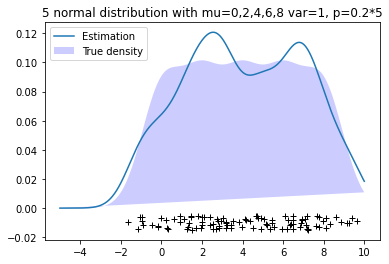

In [74]:
# generate the sample from two normal distributions
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.2 * N)),np.random.normal(2, 1, int(0.2 * N)),np.random.normal(4, 1, int(0.2 * N)), np.random.normal(6, 1, int(0.2 * N)),np.random.normal(8, 1, int(0.2 * N)) ))[:, np.newaxis]
# prepare the points where the density is calculated
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
# preparing the display of the true density, which is that from
# from which the data was generated (see above)
# the weighting of the distributions in the sum is the weighting of the
#distributions in generated sample (see above)
true_density=(0.2*norm(0,1).pdf(X_plot[:,0])+0.2*norm(2,1).pdf(X_plot[:,0])+0.2*norm(4,1).pdf(X_plot[:,0])+0.2*norm(6,1).pdf(X_plot[:,0])+0.2*norm(8,1).pdf(X_plot[:,0]))

# density estimation by Gaussian kernels
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)

# density calculation for X_plot data
density = np.exp(kde.score_samples(X_plot))

# display: true density and estimate
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label= 'True density')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.title(f'5 normal distribution with mu=0,2,4,6,8 var=1, p=0.2*5')
plt.show()

In [9]:
# define a function to vary the number of distribution
def generate_sample_withDifferentProportionDistribution(proportion):
  N = 100
  X = np.concatenate((np.random.normal(0, 1, int(proportion * N)), np.random.normal(5, 1, int((1-proportion) * N))))[:, np.newaxis]
  X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
  true_density=(proportion*norm(0,1).pdf(X_plot[:,0])+(1-proportion)*norm(5,1).pdf(X_plot[:,0]))
  # density estimation by Gaussian kernels
  kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
  density = np.exp(kde.score_samples(X_plot))
  # display: true density and estimate
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label= 'True density')
  ax.plot(X_plot[:,0], density, '-', label="Estimation")
  ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
  plt.title("Normal Distribution Proportion : " + str(proportion))
  ax.legend(loc='upper left')
  plt.show()

In [ ]:
l=[i for i in np.arange(0,1,0.1)] 
for proportion in l :
  generate_sample_withDifferentProportionDistribution(proportion)

### Question 3: Vary the bandwidth value and examine the results.

In [11]:
# define a function to generate with different bandwidth
def generate_withDifferentBandwidth(bandwidth):
  N = 100
  X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
  X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
  true_density=(0.3*norm(0,1).pdf(X_plot[:,0])+0.7*norm(5,1).pdf(X_plot[:,0]))
  # density estimation by Gaussian kernels
  kde = KernelDensity(kernel='gaussian', bandwidth= bandwidth).fit(X)
  density = np.exp(kde.score_samples(X_plot))
  # display: true density and estimate
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label= 'True density')
  ax.plot(X_plot[:,0], density, '-', label="Estimation")
  ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
  plt.title(f"Bandwidth is: {bandwidth}")
  ax.legend(loc='upper left')
  plt.show()

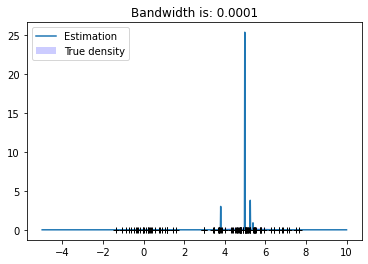

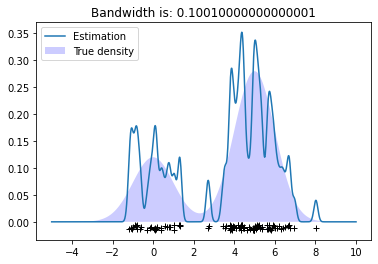

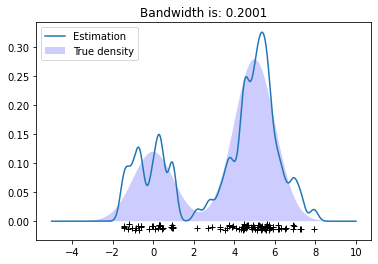

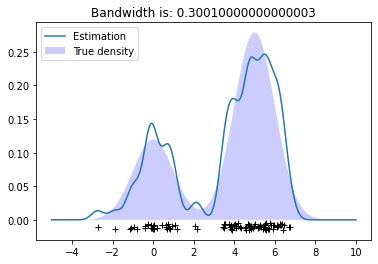

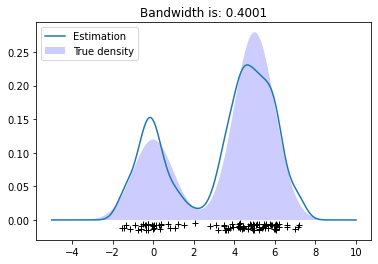

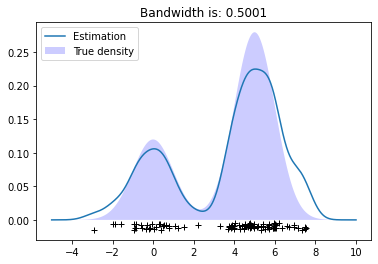

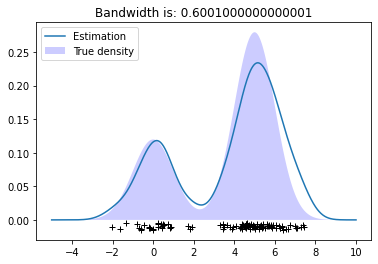

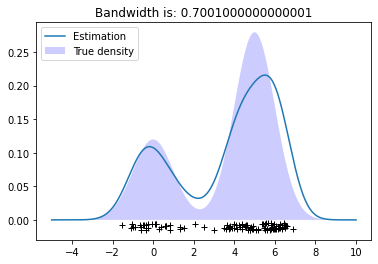

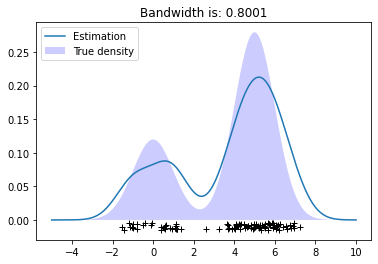

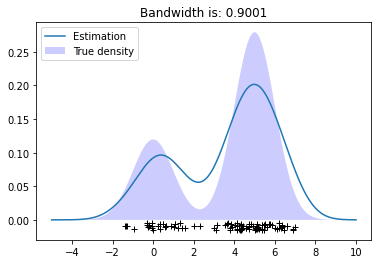

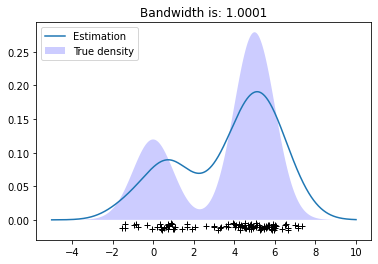

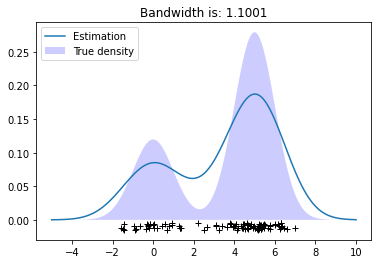

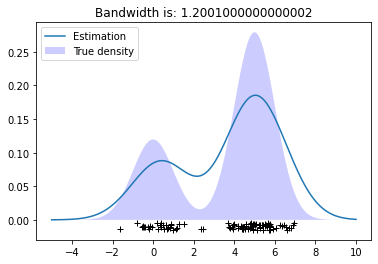

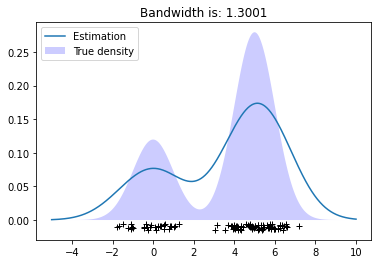

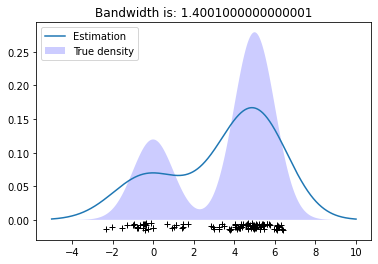

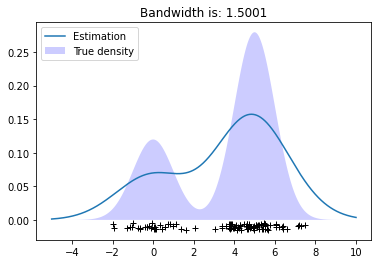

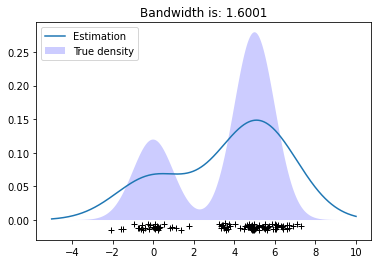

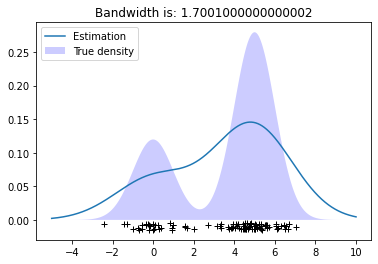

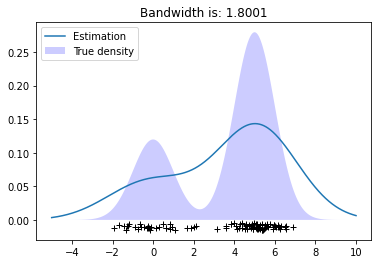

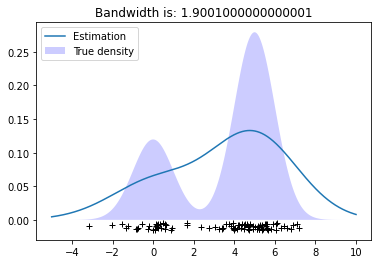

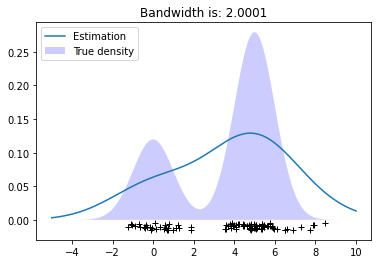

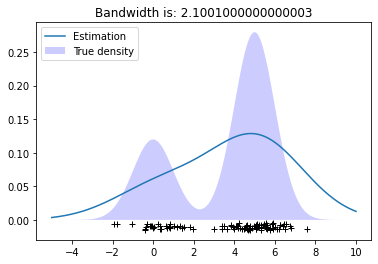

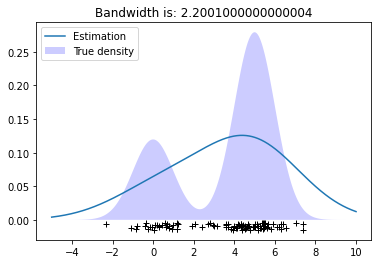

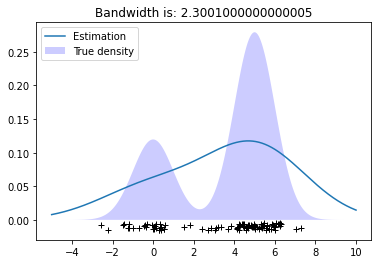

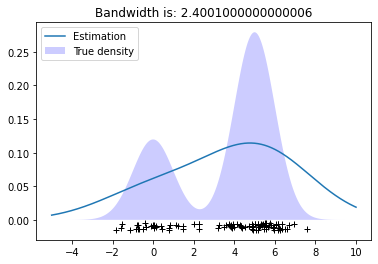

In [12]:
l=[i for i in np.arange(0.0001,2.5,0.1)] 
for bandwidth in l :
  generate_withDifferentBandwidth(bandwidth)

### Question 4: Vary the kernel type and examine the results.

In [13]:
# define a function to generate with different bandwidth
def generate_withDifferentKernalType(kernel):
  N = 100
  X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
  X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
  true_density=(0.3*norm(0,1).pdf(X_plot[:,0])+0.7*norm(5,1).pdf(X_plot[:,0]))
  # density estimation by Gaussian kernels
  kde = KernelDensity(kernel= kernel, bandwidth= 0.75).fit(X)
  density = np.exp(kde.score_samples(X_plot))
  # display: true density and estimate
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label= 'True density')
  ax.plot(X_plot[:,0], density, '-', label="Estimation")
  ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
  plt.title(f"Kernel is: {kernel}")
  ax.legend(loc='upper left')
  plt.show()

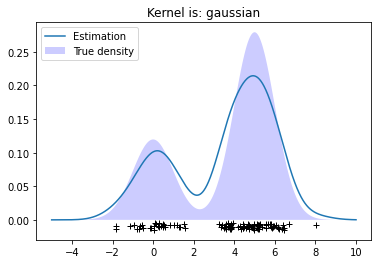

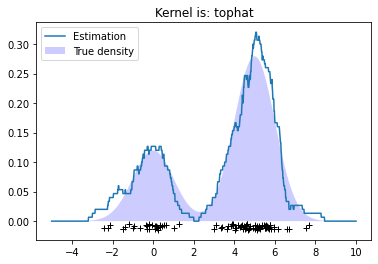

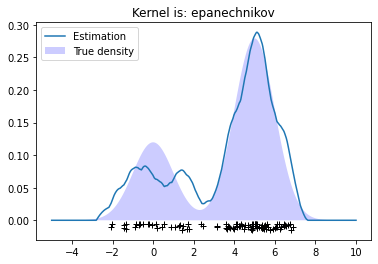

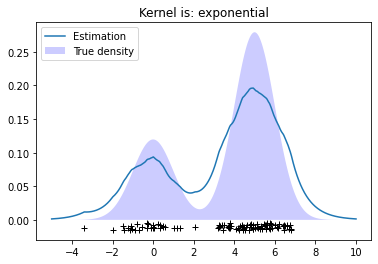

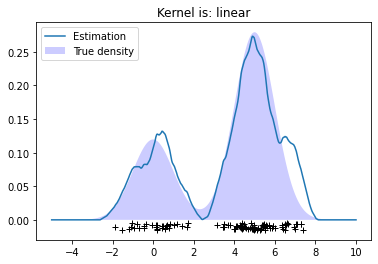

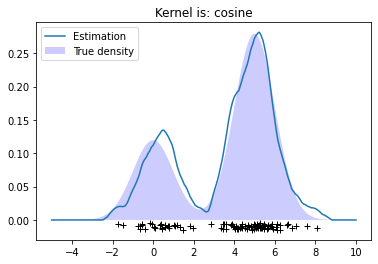

In [14]:
l = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
for kenel in l:
  generate_withDifferentKernalType(kenel)

### Question 5: Vary the bandwidth value and examine the results.

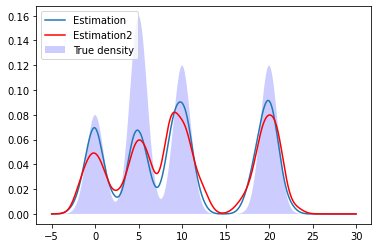

In [15]:
Xg = kde.sample(N)
kde2 = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(Xg)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(X_plot[:,0],true_density,fc='b',alpha=0.2, label='True density')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X_plot[:,0], np.exp(kde2.score_samples(X_plot)), 'r-',label="Estimation2")
ax.legend(loc='upper left')
plt.show()

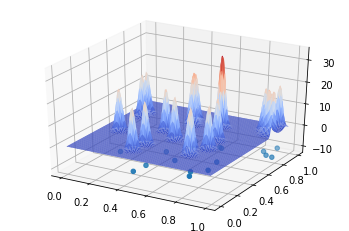

In [16]:
# generate the sample
N = 20
# random variables N rows 2 columns 
kd = np.random.rand(N, 2)
# set grid for visualization
grid_size = 100
Gx = np.arange(0, 1, 1/grid_size)
Gy = np.arange(0, 1, 1/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)
# set bandwidth for kernel
bw = 0.02
# estimation, then density calculation on the grid
kde3 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(kd)
Z= np.exp(kde3.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis], (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))
# display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, Z.reshape(grid_size,grid_size), rstride=1,
cstride=1, cmap=cm.coolwarm, linewidth=0,
antialiased=True)
ax.scatter(kd[:,0], kd[:,1], -10)
plt.show()

In [17]:
Gy.shape

(100, 100)

In [97]:
def generate1_withDifferentBandwidth(bandwidth):
  N = 20
  # random variables N rows 2 columns 
  kd = np.random.rand(N, 2)
  # set grid for visualization
  grid_size = 100
  Gx = np.arange(0, 1, 1/grid_size)
  Gy = np.arange(0, 1, 1/grid_size)
  Gx, Gy = np.meshgrid(Gx, Gy)
  # set bandwidth for kernel
  bw = bandwidth
  # estimation, then density calculation on the grid
  kde3 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(kd)
  Z= np.exp(kde3.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis], (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))
  # display
  from mpl_toolkits.mplot3d import Axes3D
  from matplotlib import cm
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  ax.plot_surface(Gx, Gy, Z.reshape(grid_size,grid_size), rstride=1,
  cstride=1, cmap=cm.coolwarm, linewidth=0,
  antialiased=True)
  ax.scatter(kd[:,0], kd[:,1], -10)
  plt.title(f"bandwidth equals: {bandwidth}")
  plt.show()


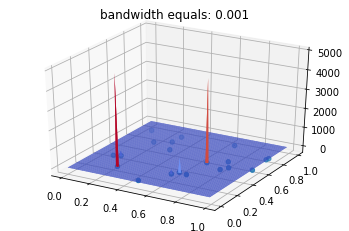

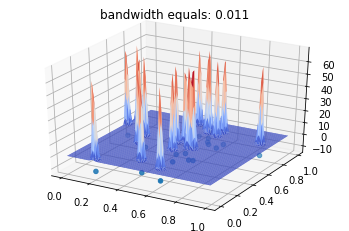

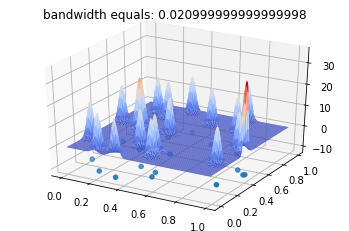

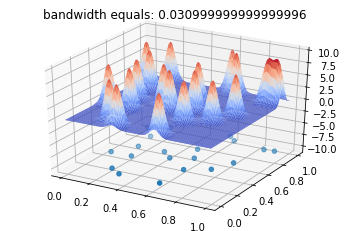

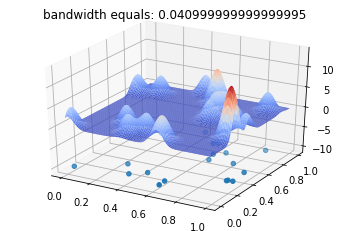

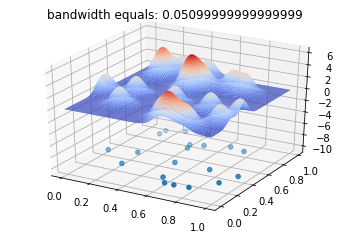

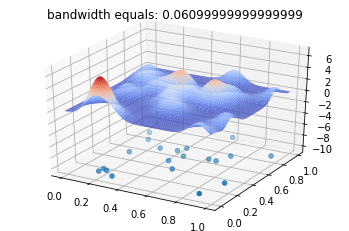

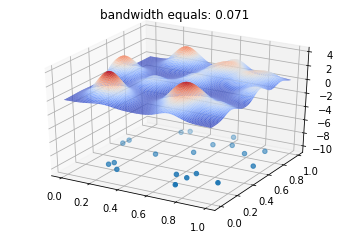

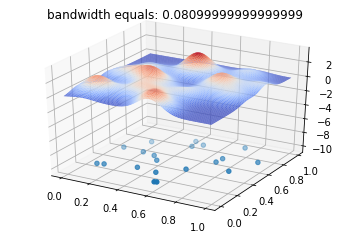

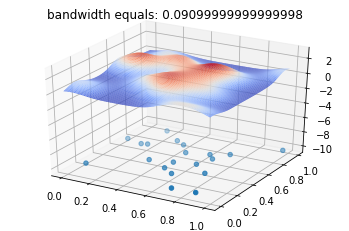

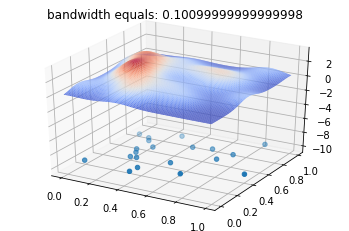

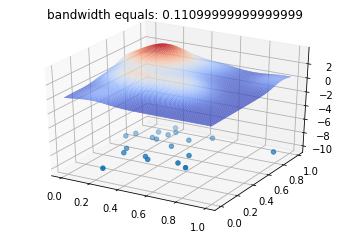

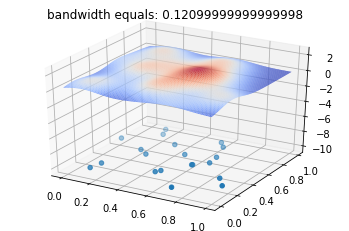

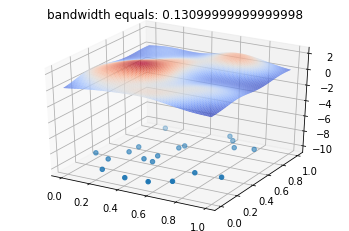

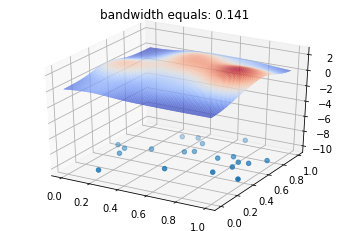

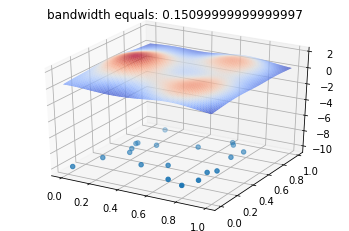

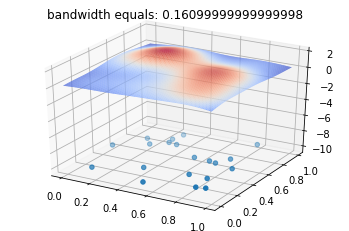

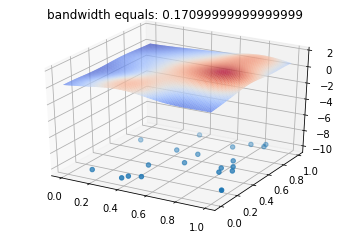

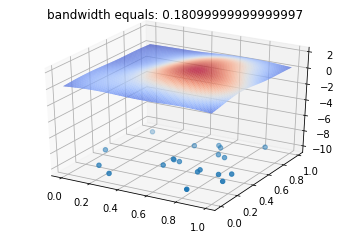

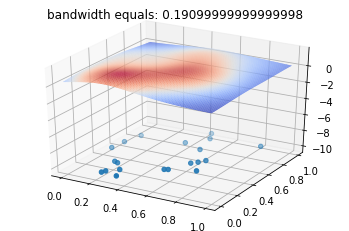

In [98]:
l=[i for i in np.arange(0.001,0.2,0.01)] 
for bandwidth in l :
  generate1_withDifferentBandwidth(bandwidth)

**Question 6: Generate the sample from a sum of 2 different normal distributions (with larger N) and examine the results.**

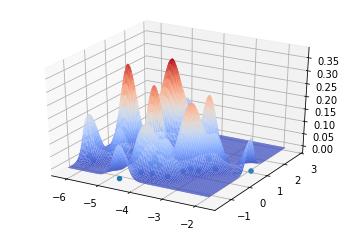

In [119]:
# generate the sample
N =30
# random variables N rows 2 columns 
#kd = np.concatenate((np.random.normal(0, 1,size=(int(0.3 * N),2)) , np.random.normal(5, 1, size=(int(0.7 * N),2))) )[:, np.newaxis]
kd1=np.random.normal(0, 1,size=(N,2))
kd2=np.random.normal(0, 1,size=(N,2))
kd=np.concatenate((kd1,kd2))
#X = np.random.rand(N, 2)
# set grid for visualization
grid_size1 = 100

mx = min(kd[:,0])
Mx = max(kd[:,0])
my = min(kd[:,1])
My = max(kd[:,1])
xstep = (Mx - mx) / grid_size
ystep = (My - my) / grid_size
Gx = np.arange(mx, Mx, xstep)
Gy = np.arange(my, My, ystep)
Gx, Gy = np.meshgrid(Gx, Gy) 

# Gx = np.arange(kd.min(),kd.max(), 1/grid_size)
# Gy = np.arange(kd.min(),kd.max(), 1/grid_size)
# Gx, Gy = np.meshgrid(Gx, Gy)
# set bandwidth for kernel
bw = 0.2
# estimation, then density calculation on the grid
kde3 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(kd)
Z= np.exp(kde3.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis], (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))
# display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, Z.reshape(grid_size,grid_size), rstride=1,
cstride=1, cmap=cm.coolwarm, linewidth=0,
antialiased=True)
ax.scatter(kd[:,0], kd[:,1], 0)
plt.show()

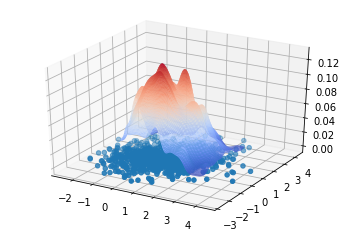

In [116]:
# generate sample
N = 1000
kd1 = np.random.randn(int(N/2), 2) + (1.0,1.0)
kd2 = np.random.randn(int(N/2), 2)
kd = np.concatenate((kd1, kd2))

# define the grid for the visualization
grid_size = 100
Gx = np.arange(-1, 3, 4/grid_size)
Gy = np.arange(-1, 3, 4/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)

# define the size of the bandwidth
bw = 0.2

# estimate and compute density in the grid
kde4 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(kd)
Z= np.exp(kde4.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis], (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))
# display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, Z.reshape(grid_size,grid_size), rstride=1,
cstride=1, cmap=cm.coolwarm, linewidth=0,
antialiased=True)
ax.scatter(kd[:,0], kd[:,1], 0)
plt.show()

In [ ]:
Gy.shape

In [ ]:
kd1=np.random.normal(0, 1,size=(N,2))
kd2=np.random.normal(0, 1,size=(N,2))
#X = np.random.rand(N, 2)
kd1[1],kd2[1]

In [ ]:
# define the function 

### Question 7: Vary the sample size and examine the results. What are the consequences of an increase in N?

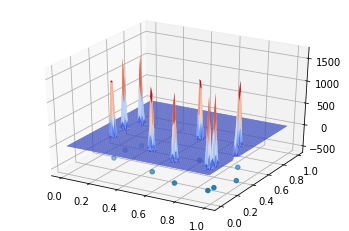

In [120]:
# generate the sample
N = 10
kd = np.random.rand(N, 2)
# set grid for visualization
grid_size = 100
Gx = np.arange(0, 1, 1/grid_size)
Gy = np.arange(0, 1, 1/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)
bw = 0.01
# direct density calculation on the grid
from scipy.stats import multivariate_normal
Z = np.zeros((grid_size,grid_size))
for i in range(N):
# generation of a two-dimensional normal distribution centered on the
#point kd[i] and with standard deviation bw
  Z = Z + multivariate_normal.pdf(np.dstack((Gx, Gy)),mean=[kd[i,0], kd[i,1]], cov=[[bw**2, 0], [0, bw**2]])
# display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
linewidth=0, antialiased=True)
ax.scatter(kd[:,0], kd[:,1], -500)
plt.show()

In [121]:
def increaseN(N):
  # generate the sample
  N = N
  kd = np.random.rand(N, 2)
  # set grid for visualization
  grid_size = 100
  Gx = np.arange(0, 1, 1/grid_size)
  Gy = np.arange(0, 1, 1/grid_size)
  Gx, Gy = np.meshgrid(Gx, Gy)
  bw = 0.01
  # direct density calculation on the grid
  from scipy.stats import multivariate_normal
  Z = np.zeros((grid_size,grid_size))
  for i in range(N):
  # generation of a two-dimensional normal distribution centered on the
  #point kd[i] and with standard deviation bw
    Z = Z + multivariate_normal.pdf(np.dstack((Gx, Gy)),mean=[kd[i,0], kd[i,1]], cov=[[bw**2, 0], [0, bw**2]])
  # display
  from mpl_toolkits.mplot3d import Axes3D
  from matplotlib import cm
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  ax.plot_surface(Gx, Gy, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
  linewidth=0, antialiased=True)
  ax.scatter(kd[:,0], kd[:,1], -500)
  plt.title(f" N is {N}")
  plt.show()

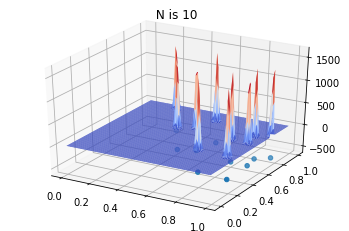

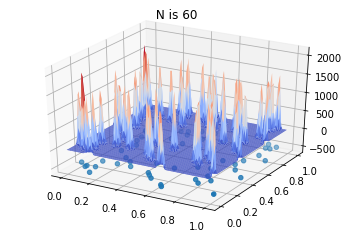

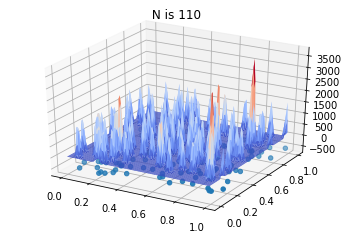

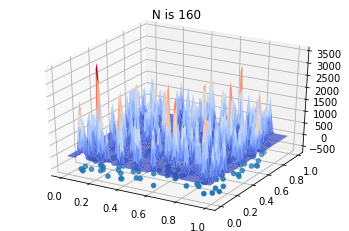

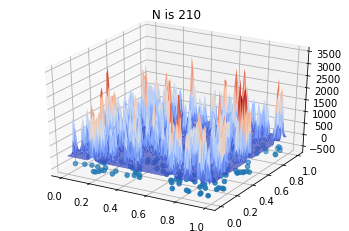

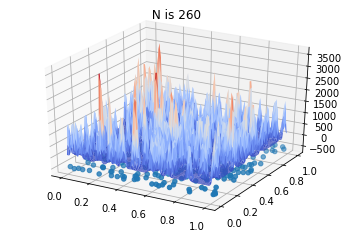

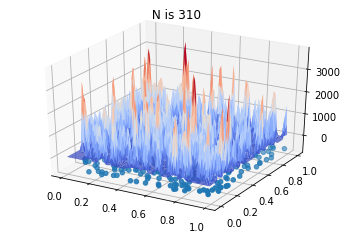

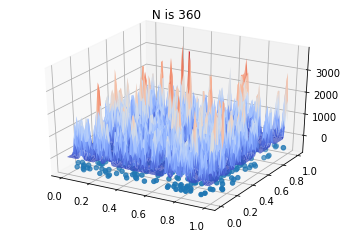

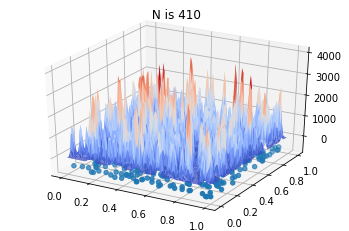

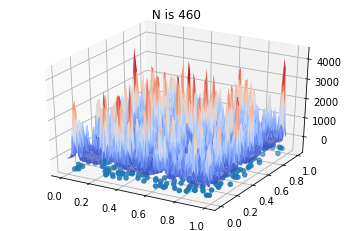

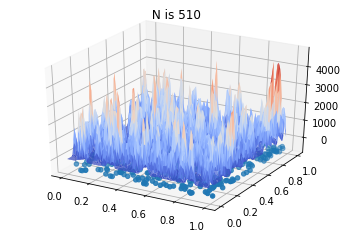

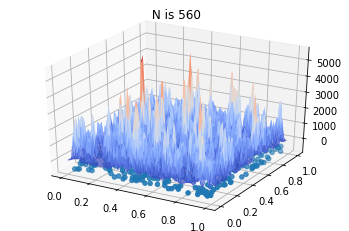

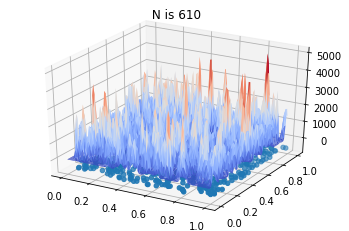

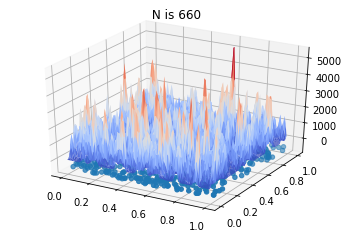

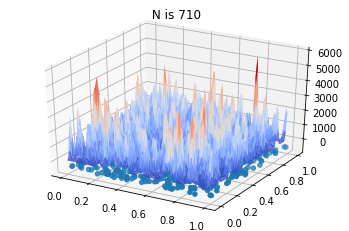

In [122]:
l=[i for i in np.arange(10,711, 50)] 
for n in l :
  increaseN(n)

In [92]:
import pandas as pd
# reading data
# textures = np.loadtxt('texture.dat')
from google.colab import files
uploaded = files.upload()
textures = np.loadtxt("texture.dat")
textures.shape

Saving texture.dat to texture.dat


(5500, 41)

In [ ]:
textures.shape

### Question 8: Apply principal component analysis to this data and estimate the density of the projected data on the first principal axis (or the first two principal axes). Vary the “window” width (bandwidth). Visualize the results.

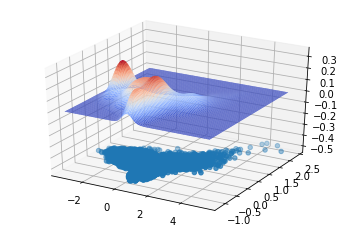

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(textures[:,0:40])
texturesp = pca.transform(textures[:,:40])
# set grid for visualization
grid_size = 100
mx = min(texturesp[:,0])
Mx = max(texturesp[:,0])
my = min(texturesp[:,1])
My = max(texturesp[:,1])
xstep = (Mx - mx) / grid_size
ystep = (My - my) / grid_size
Gx = np.arange(mx, Mx, xstep)
Gy = np.arange(my, My, ystep)
Gx, Gy = np.meshgrid(Gx, Gy)
######## TO BE COMPLETED #########
bandwidth = 0.2

kde3 = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(texturesp)
Z= np.exp(kde3.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis], (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

# display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, Z.reshape(grid_size,grid_size), rstride=1,
cstride=1, cmap=cm.coolwarm, linewidth=0,
antialiased=True)
ax.scatter(texturesp[:,0], texturesp[:,1], -0.5)
plt.show()

In [132]:
def text(bd):
  from sklearn.decomposition import PCA
  pca = PCA(n_components=2)
  pca.fit(textures[:,0:40])
  texturesp = pca.transform(textures[:,:40])
  # set grid for visualization
  grid_size = 100
  mx = min(texturesp[:,0])
  Mx = max(texturesp[:,0])
  my = min(texturesp[:,1])
  My = max(texturesp[:,1])
  xstep = (Mx - mx) / grid_size
  ystep = (My - my) / grid_size
  Gx = np.arange(mx, Mx, xstep)
  Gy = np.arange(my, My, ystep)
  Gx, Gy = np.meshgrid(Gx, Gy)
  ######## TO BE COMPLETED #########
  bandwidth = bd

  kde3 = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(texturesp)
  Z= np.exp(kde3.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis], (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

  # display
  from mpl_toolkits.mplot3d import Axes3D
  from matplotlib import cm
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  ax.plot_surface(Gx, Gy, Z.reshape(grid_size,grid_size), rstride=1,
  cstride=1, cmap=cm.coolwarm, linewidth=0,
  antialiased=True)
  ax.scatter(texturesp[:,0], texturesp[:,1], -0.5)
  plt.title(f'PCA , bandwidth is {bd}')
  plt.show()

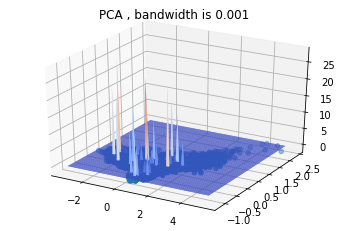

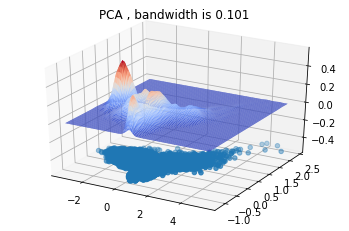

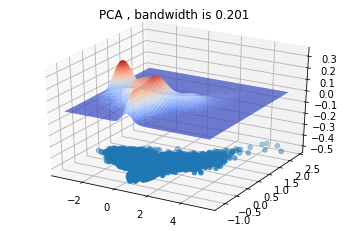

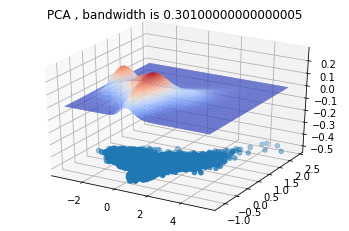

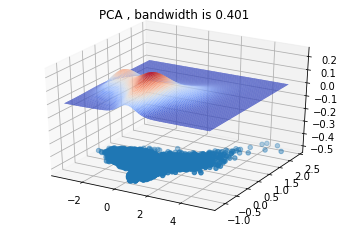

In [133]:
l=[i for i in np.arange(0.001, 0.41, 0.1)] 
for n in l :
  text(n)

Question 9: Apply discriminant analysis to this data and estimate the density of the projected data on the first discriminant axis (or the first two discriminant axes). Vary the “window” width (bandwidth). Visualize the results.
Hint: Rely on the structure of the code of the question 8 and use lda

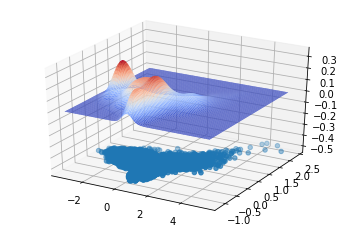

In [94]:
#Apply discriminant analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA(n_components=2).fit(textures[:,0:40],textures[:,40]).transform(textures[:,:40])
# set grid for visualization
grid_size = 100
mx = min(texturesp[:,0])
Mx = max(texturesp[:,0])
my = min(texturesp[:,1])
My = max(texturesp[:,1])
xstep = (Mx - mx) / grid_size
ystep = (My - my) / grid_size
Gx = np.arange(mx, Mx, xstep)
Gy = np.arange(my, My, ystep)
Gx, Gy = np.meshgrid(Gx, Gy)
######## TO BE COMPLETED #########
bandwidth = 0.2

kde3 = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(texturesp)
Z= np.exp(kde3.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis], (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

# display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, Z.reshape(grid_size,grid_size), rstride=1,
cstride=1, cmap=cm.coolwarm, linewidth=0,
antialiased=True)
ax.scatter(texturesp[:,0], texturesp[:,1], -0.5)
plt.title(f'LDA , bandwidth is {bandwidth}')
plt.show()

In [134]:
def text1(bd):
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
  lda = LDA(n_components=2).fit(textures[:,0:40],textures[:,40]).transform(textures[:,:40])
  # set grid for visualization
  grid_size = 100
  mx = min(texturesp[:,0])
  Mx = max(texturesp[:,0])
  my = min(texturesp[:,1])
  My = max(texturesp[:,1])
  xstep = (Mx - mx) / grid_size
  ystep = (My - my) / grid_size
  Gx = np.arange(mx, Mx, xstep)
  Gy = np.arange(my, My, ystep)
  Gx, Gy = np.meshgrid(Gx, Gy)
  ######## TO BE COMPLETED #########
  bandwidth = bd

  kde3 = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(texturesp)
  Z= np.exp(kde3.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis], (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

  # display
  from mpl_toolkits.mplot3d import Axes3D
  from matplotlib import cm
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  ax.plot_surface(Gx, Gy, Z.reshape(grid_size,grid_size), rstride=1,
  cstride=1, cmap=cm.coolwarm, linewidth=0,
  antialiased=True)
  ax.scatter(texturesp[:,0], texturesp[:,1], -0.5)
  plt.title(f'LDA , bandwidth is {bandwidth}')
  plt.show()

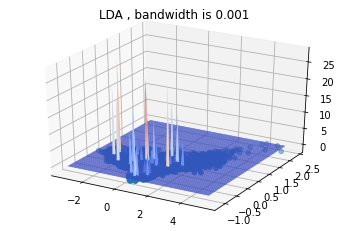

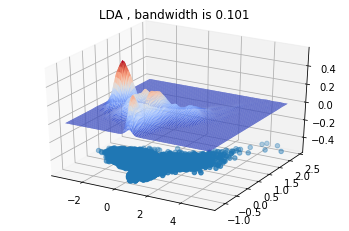

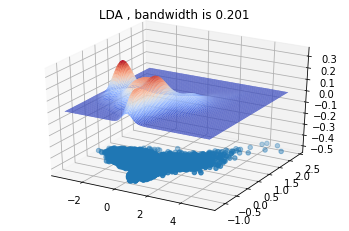

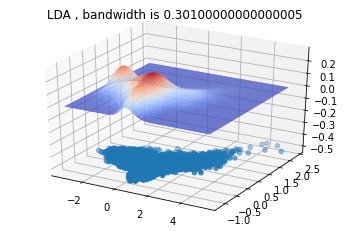

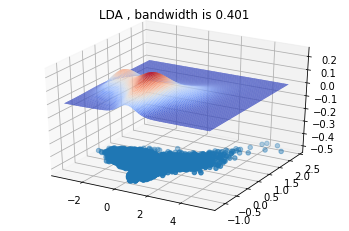

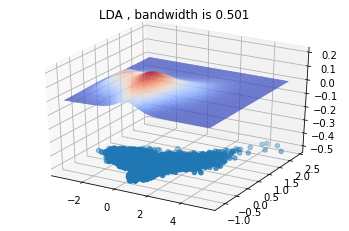

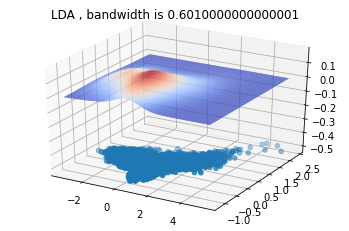

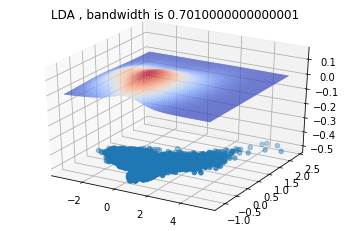

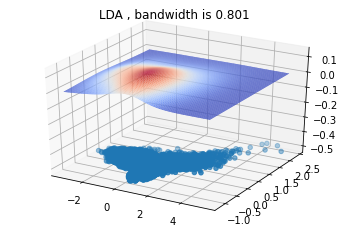

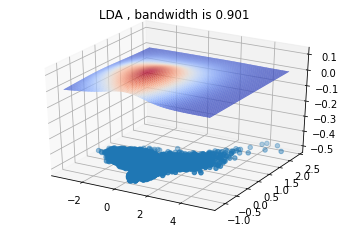

In [135]:
l=[i for i in np.arange(0.001,1,0.1)] 
for n in l :
  text1(n)